# Prueba técnica
Experto Ciencia de Datos

## Análisis exploratorio de datos

In [1]:

import numpy as np
import pandas as pd

import missingno as msno
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos desde un archivo Parquet
df = pd.read_parquet('../data/df_prueba.parquet.gzip')
df_1500 = df[df['REV_TOTAL'] > 1500].reset_index(drop=True)
# Resumen básico
print(df['TIPO'].value_counts())
df.groupby('TIPO')['REV_TOTAL'].describe()

TIPO
Base     490841
Churn      9159
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
TIPO,,,,,,,,
Base,490841.0,8335.644410,11535.99367,-82047.0,15.0,2927.0,14774.00,234862.0
Churn,6404.0,6241.660993,9903.52322,-18418.0,0.0,1507.5,9177.75,148900.0


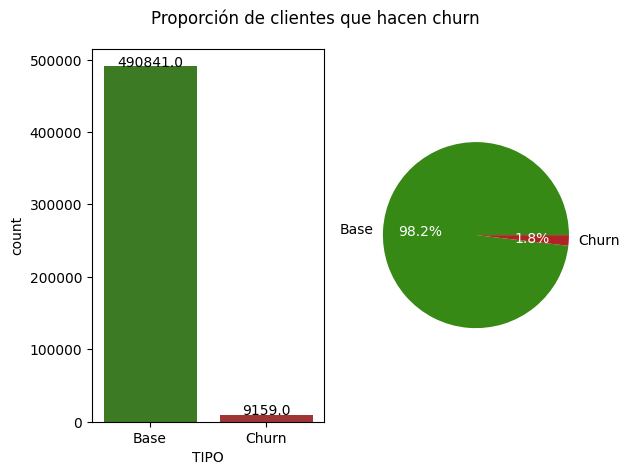

In [3]:
fig, axs = plt.subplots(nrows=1,ncols=2)
# Distribución de churn
Titulo = 'Proporción de clientes que hacen churn'
colors = ['#368915', '#B12323']
sns.countplot(x='TIPO', hue='TIPO', data=df, ax=axs[0], palette=colors)
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline')

axs[1] = df['TIPO'].value_counts(normalize=True).plot(kind='pie', ylabel='', colors=colors, autopct='%1.1f%%')
for text in list(axs[1].texts)[1::2]:
    text.set_color('white')
fig.suptitle(Titulo)
fig.tight_layout()
#sns.boxplot(x='TIPO', data=df)
#sns.countplot(x='TIPO', data=df_sample)
plt.show()

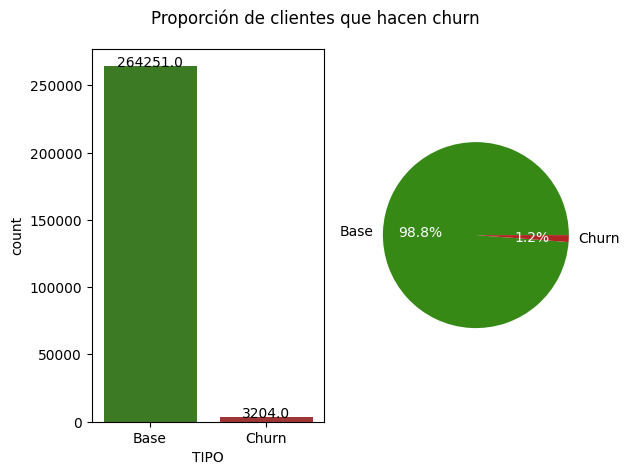

In [4]:
fig, axs = plt.subplots(nrows=1,ncols=2)
# Distribución de churn
Titulo = 'Proporción de clientes que hacen churn'
colors = ['#368915', '#B12323']
sns.countplot(x='TIPO', hue='TIPO', data=df_1500, ax=axs[0], palette=colors)
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline')

axs[1] = df_1500['TIPO'].value_counts(normalize=True).plot(kind='pie', ylabel='', colors=colors, autopct='%1.1f%%')
for text in list(axs[1].texts)[1::2]:
    text.set_color('white')
fig.suptitle(Titulo)
fig.tight_layout()
#sns.boxplot(x='TIPO', data=df)
#sns.countplot(x='TIPO', data=df_sample)
plt.show()

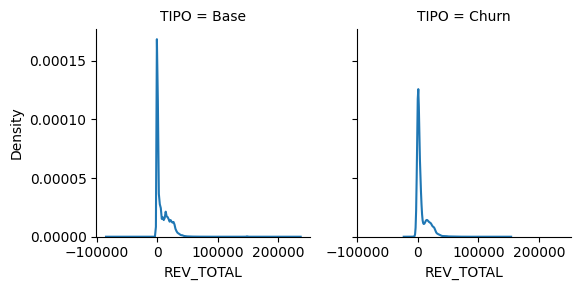

In [5]:
g = sns.FacetGrid(df, col="TIPO")
g.map(sns.kdeplot, "REV_TOTAL")

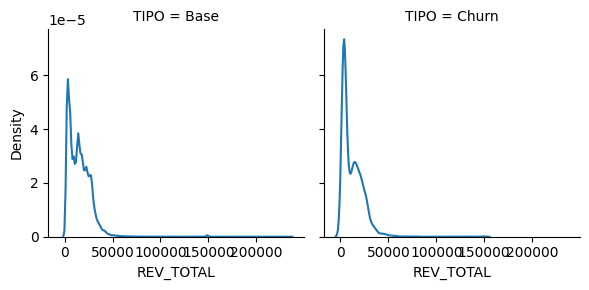

In [6]:
g = sns.FacetGrid(df_1500, col="TIPO")
g.map(sns.kdeplot, "REV_TOTAL")

qty_pqt_M.3             42.828139
pqt_mas_comprado_M.3    42.828139
qty_pqt_M.2             38.519003
pqt_mas_comprado_M.2    38.519003
qty_pqt_M.1             33.348414
pqt_mas_comprado_M.1    33.348414
QTY_PQT                 15.131517
PQT_MAS_COMPRADO        15.131517
DIAS_INACTIVIDAD         6.846759
ACTIVATION_CHANNEL       0.007852
dtype: float64


<Axes: >

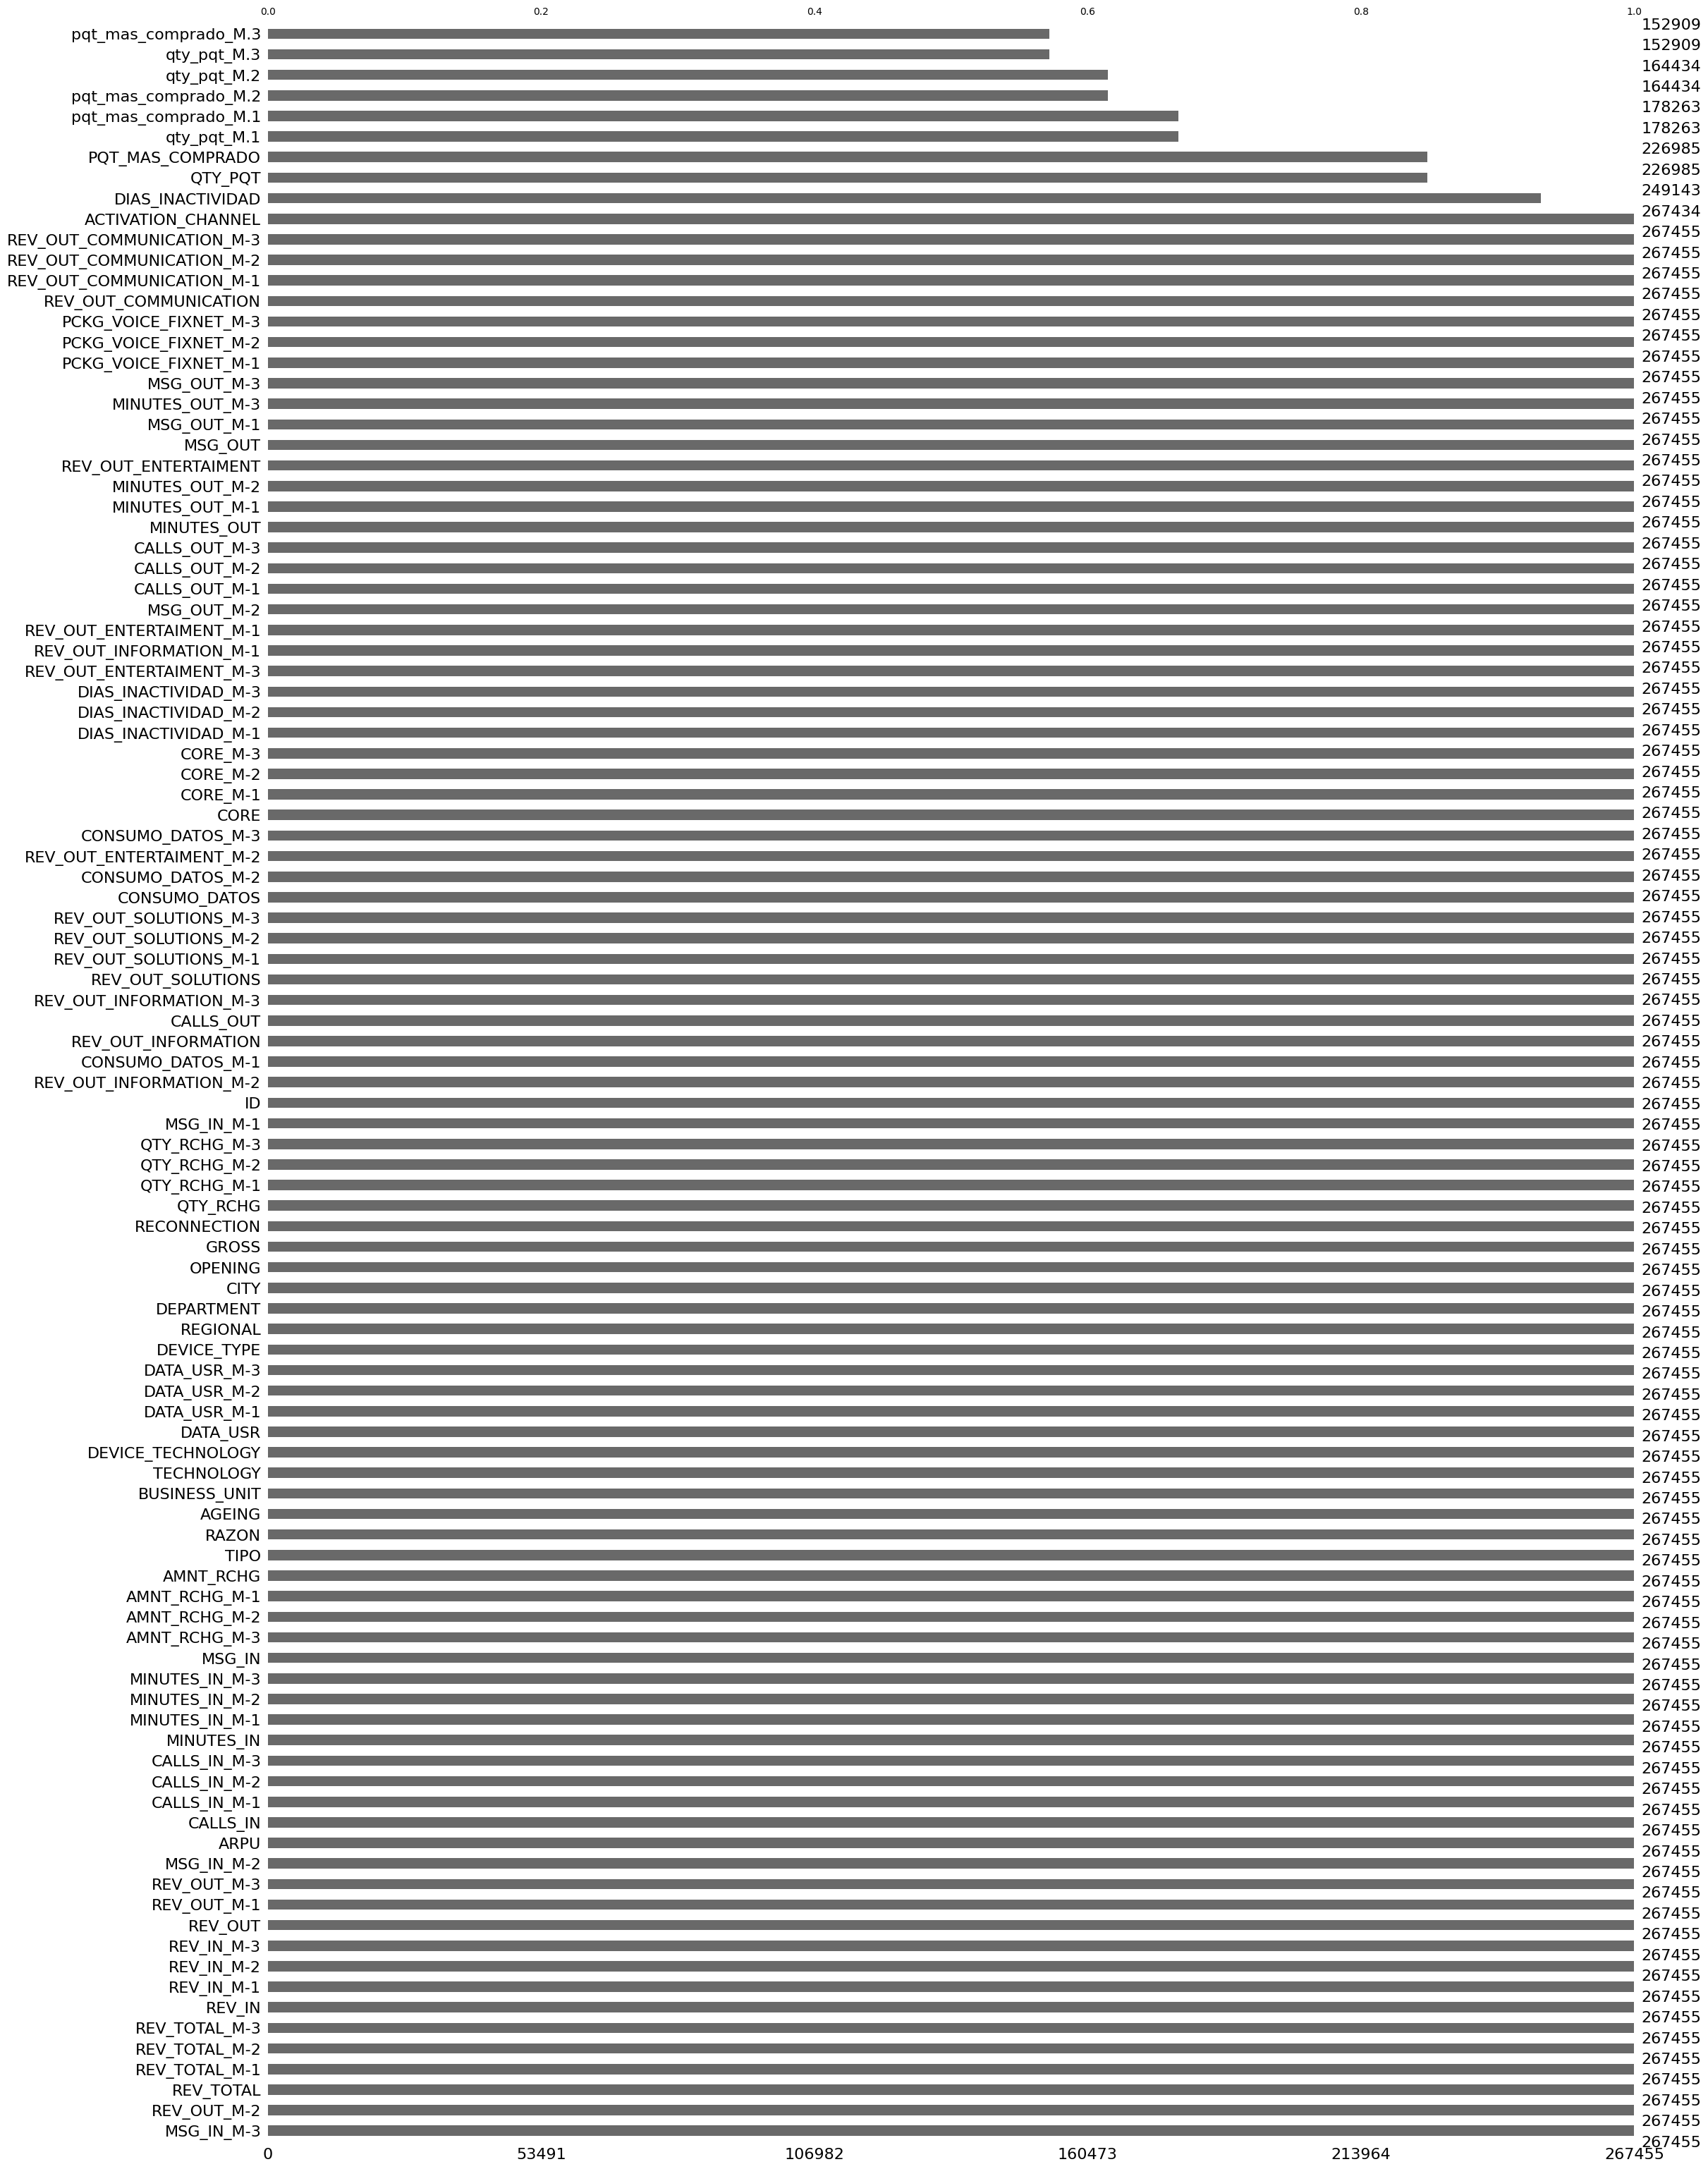

In [7]:
# Porcentaje de valores faltantes por columna
missing_data = df_1500.isnull().mean() * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

# Visualización de los valores faltantes
msno.bar(df_1500, sort="descending")

In [8]:
print(df_1500[df_1500['TIPO']=='Churn'].isnull().sum().sort_values(ascending=False))
df_1500[(df_1500['TIPO']=='Churn')].head()

pqt_mas_comprado_M.3    3204
qty_pqt_M.3             3204
pqt_mas_comprado_M.2    3204
qty_pqt_M.2             3204
pqt_mas_comprado_M.1    3204
                        ... 
REV_IN                     0
REV_TOTAL_M-3              0
REV_TOTAL_M-2              0
REV_TOTAL_M-1              0
MSG_IN_M-3                 0
Length: 103, dtype: int64


,ID,TIPO,RAZON,ACTIVATION_CHANNEL,AGEING,BUSINESS_UNIT,TECHNOLOGY,DEVICE_TECHNOLOGY,DATA_USR,DATA_USR_M-1,...,DIAS_INACTIVIDAD_M-2,DIAS_INACTIVIDAD_M-3,QTY_PQT,PQT_MAS_COMPRADO,qty_pqt_M.1,pqt_mas_comprado_M.1,qty_pqt_M.2,pqt_mas_comprado_M.2,qty_pqt_M.3,pqt_mas_comprado_M.3
33,56,Churn,Port Out,DISTRIBUIDORES,1.0,MOBILE,2G,4G,Y,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
157,316,Churn,Port Out,DISTRIBUIDORES,2.0,MOBILE,2G,4G,Y,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
350,656,Churn,Port Out,TO BE DETERMINED,20.0,MOBILE,4G,4G,Y,Y,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
361,671,Churn,Port Out,DISTRIBUIDORES,2.0,MOBILE,2G,3G,Y,N,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None
471,858,Churn,Port Out,DISTRIBUIDORES,29.0,MOBILE,3G,4G,Y,Y,...,0,0,NaN,None,NaN,None,NaN,None,NaN,None


In [9]:
df_1500[(df_1500['TIPO']=='Churn')].dropna(axis=1, how='all').head()

,ID,TIPO,RAZON,ACTIVATION_CHANNEL,AGEING,BUSINESS_UNIT,TECHNOLOGY,DEVICE_TECHNOLOGY,DATA_USR,DATA_USR_M-1,...,CONSUMO_DATOS_M-2,CONSUMO_DATOS_M-3,CORE,CORE_M-1,CORE_M-2,CORE_M-3,DIAS_INACTIVIDAD,DIAS_INACTIVIDAD_M-1,DIAS_INACTIVIDAD_M-2,DIAS_INACTIVIDAD_M-3
33,56,Churn,Port Out,DISTRIBUIDORES,1.0,MOBILE,2G,4G,Y,N,...,0.0,0.0,CORE,NO CORE,NO CORE,NO CORE,7.0,0,0,0
157,316,Churn,Port Out,DISTRIBUIDORES,2.0,MOBILE,2G,4G,Y,N,...,0.0,0.0,CORE,NO CORE,NO CORE,NO CORE,0.0,13,0,0
350,656,Churn,Port Out,TO BE DETERMINED,20.0,MOBILE,4G,4G,Y,Y,...,22972079.8,25644560.4,CORE,CORE,CORE,CORE,1.0,0,0,0
361,671,Churn,Port Out,DISTRIBUIDORES,2.0,MOBILE,2G,3G,Y,N,...,0.0,0.0,CORE,NO CORE,NO CORE,NO CORE,0.0,23,0,0
471,858,Churn,Port Out,DISTRIBUIDORES,29.0,MOBILE,3G,4G,Y,Y,...,30416556.6,23391752.1,CORE,CORE,CORE,CORE,0.0,0,0,0


In [11]:
numerical_columns = df_1500.select_dtypes(include=[float, int]).columns
target = np.where(df_1500['TIPO']=='Base',0,1)  # Assuming churn is binary (0 or 1)

for col in tqdm(numerical_columns):
    corr, p_value = pointbiserialr(df_1500[col].fillna(-10), target)
    print(f'Feature: {col}, Correlation: {corr}, p-value: {p_value}')

  0%|          | 0/78 [00:00<?, ?it/s]

Feature: ID, Correlation: -0.003503835685349006, p-value: 0.06997961967011718
Feature: AGEING, Correlation: -0.036311799544630374, p-value: 9.99300802787467e-79
Feature: QTY_RCHG, Correlation: -0.013758803599827755, p-value: 1.1125464703681502e-12
Feature: QTY_RCHG_M-1, Correlation: -0.02225990690914137, p-value: 1.1304428145363454e-30
Feature: QTY_RCHG_M-2, Correlation: -0.030420544217344983, p-value: 8.586515763830108e-56
Feature: QTY_RCHG_M-3, Correlation: -0.03235307404285313, p-value: 7.16014805903554e-63
Feature: AMNT_RCHG, Correlation: -0.02945087146299211, p-value: 2.1012464670611787e-52
Feature: AMNT_RCHG_M-1, Correlation: -0.025004380092725455, p-value: 2.922404633970903e-38
Feature: AMNT_RCHG_M-2, Correlation: -0.03188412992880528, p-value: 4.097384108256395e-61
Feature: AMNT_RCHG_M-3, Correlation: -0.034346265044910916, p-value: 1.2576182562591266e-70
Feature: REV_TOTAL, Correlation: -0.027688877703552606, p-value: 1.5884146370491101e-46
Feature: REV_TOTAL_M-1, Correlation:

C:\Users\andre\OneDrive\Documents\Data Science\Pruebas_Tecnicas\tigo\Lib\site-packages\scipy\stats\_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


Feature: MINUTES_IN_M-1, Correlation: -0.009163380072132677, p-value: 2.1475885842766605e-06
Feature: MINUTES_IN_M-2, Correlation: -0.013986983944263016, p-value: 4.69539244783641e-13
Feature: MINUTES_IN_M-3, Correlation: -0.01824465963929425, p-value: 3.866958257291631e-21
Feature: MSG_IN, Correlation: 0.00046665956850759573, p-value: 0.8092941000703561
Feature: MSG_IN_M-1, Correlation: -0.0034787769326647486, p-value: 0.0720055348697948
Feature: MSG_IN_M-2, Correlation: -0.00632152144677687, p-value: 0.001078296724436794
Feature: MSG_IN_M-3, Correlation: -0.005024056784755841, p-value: 0.009370077812976644
Feature: CALLS_OUT, Correlation: -0.005292414740367164, p-value: 0.006199582572837635
Feature: CALLS_OUT_M-1, Correlation: -0.00750264590080784, p-value: 0.00010440979294812517
Feature: CALLS_OUT_M-2, Correlation: -0.013642841228496036, p-value: 1.7156832231108235e-12
Feature: CALLS_OUT_M-3, Correlation: -0.015594619716466964, p-value: 7.301182985954069e-16
Feature: MINUTES_OUT, Co

In [12]:
categorical_columns = df_1500.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.tolist()
categorical_columns.remove('TIPO')

def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

for col in categorical_columns:
    contingency_table = pd.crosstab(df_1500[col].fillna('None'), df['TIPO'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)
    cramers_v_value = cramers_v(chi2, n, min_dim)
    print(f'Feature: {col}, Cramér\'s V: {cramers_v_value}')

Feature: RAZON, Cramér's V: 0.0
Feature: ACTIVATION_CHANNEL, Cramér's V: 0.006010823942138325
Feature: BUSINESS_UNIT, Cramér's V: nan
Feature: TECHNOLOGY, Cramér's V: 0.0027057194437958816


C:\Users\andre\AppData\Local\Temp\ipykernel_96772\83838690.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min_dim - 1)))


Feature: DEVICE_TECHNOLOGY, Cramér's V: 0.0023843841859322954
Feature: DATA_USR, Cramér's V: 0.0033393363824648203
Feature: DATA_USR_M-1, Cramér's V: 0.0021547863524678744
Feature: DATA_USR_M-2, Cramér's V: 7.972034763067634e-05
Feature: DATA_USR_M-3, Cramér's V: 0.001574761399360633
Feature: DEVICE_TYPE, Cramér's V: 0.002718523736513433
Feature: REGIONAL, Cramér's V: 0.0035185208601632243
Feature: DEPARTMENT, Cramér's V: 0.011501945885859226
Feature: CITY, Cramér's V: 0.051873344607405836
Feature: OPENING, Cramér's V: 0.000772771688129543
Feature: GROSS, Cramér's V: 0.0011502179096412593
Feature: RECONNECTION, Cramér's V: 0.0011079559139622426
Feature: CORE, Cramér's V: nan
Feature: CORE_M-1, Cramér's V: 0.0014479280722515318
Feature: CORE_M-2, Cramér's V: 0.0009267220902898515


C:\Users\andre\AppData\Local\Temp\ipykernel_96772\83838690.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min_dim - 1)))


Feature: CORE_M-3, Cramér's V: 0.0003286269123899911
Feature: PQT_MAS_COMPRADO, Cramér's V: 0.012844348547553173
Feature: pqt_mas_comprado_M.1, Cramér's V: 0.011561698284691651
Feature: pqt_mas_comprado_M.2, Cramér's V: 0.013213892724054979
Feature: pqt_mas_comprado_M.3, Cramér's V: 0.012741074652428977


In [13]:
from sklearn.feature_selection import VarianceThreshold

df_sample = df_1500.sample(frac=0.05, random_state=42)

X_sample = df_sample.drop(columns=['TIPO','RAZON']).select_dtypes(include=[float, int])
# Eliminar variables con baja varianza
selector = VarianceThreshold(threshold=0.01)
X_high_variance = selector.fit_transform(X_sample)

# Nuevas columnas con alta varianza
columns_kept = X_sample.columns[selector.get_support()]
print(columns_kept)

Index(['ID', 'AGEING', 'QTY_RCHG', 'QTY_RCHG_M-1', 'QTY_RCHG_M-2',
       'QTY_RCHG_M-3', 'AMNT_RCHG', 'AMNT_RCHG_M-1', 'AMNT_RCHG_M-2',
       'AMNT_RCHG_M-3', 'REV_TOTAL', 'REV_TOTAL_M-1', 'REV_TOTAL_M-2',
       'REV_TOTAL_M-3', 'REV_IN', 'REV_IN_M-1', 'REV_IN_M-2', 'REV_IN_M-3',
       'REV_OUT', 'REV_OUT_M-1', 'REV_OUT_M-2', 'REV_OUT_M-3', 'CALLS_IN',
       'CALLS_IN_M-1', 'CALLS_IN_M-2', 'CALLS_IN_M-3', 'MINUTES_IN',
       'MINUTES_IN_M-1', 'MINUTES_IN_M-2', 'MINUTES_IN_M-3', 'MSG_IN',
       'MSG_IN_M-1', 'MSG_IN_M-2', 'MSG_IN_M-3', 'CALLS_OUT', 'CALLS_OUT_M-1',
       'CALLS_OUT_M-2', 'CALLS_OUT_M-3', 'MINUTES_OUT', 'MINUTES_OUT_M-1',
       'MINUTES_OUT_M-2', 'MINUTES_OUT_M-3', 'MSG_OUT', 'MSG_OUT_M-1',
       'MSG_OUT_M-2', 'MSG_OUT_M-3', 'REV_OUT_COMMUNICATION',
       'REV_OUT_COMMUNICATION_M-1', 'REV_OUT_COMMUNICATION_M-2',
       'REV_OUT_COMMUNICATION_M-3', 'REV_OUT_ENTERTAIMENT',
       'REV_OUT_ENTERTAIMENT_M-1', 'REV_OUT_ENTERTAIMENT_M-2',
       'REV_OUT_ENTERTAIME

## Entrenamiento del modelo

### Modelo limitado

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [15]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
cols = df_1500[(df_1500['TIPO']=='Churn')].dropna(axis=1, how='all').columns

X = df_1500[cols].select_dtypes(include=[int, float]).fillna(0)
y = df_1500['TIPO']
smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Base       0.99      1.00      1.00     79316
       Churn       0.79      0.30      0.43       921

    accuracy                           0.99     80237
   macro avg       0.89      0.65      0.71     80237
weighted avg       0.99      0.99      0.99     80237



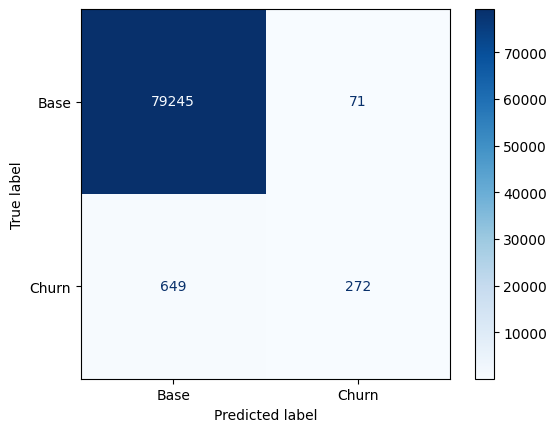

In [17]:
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred, cmap='Blues')
plt.show()

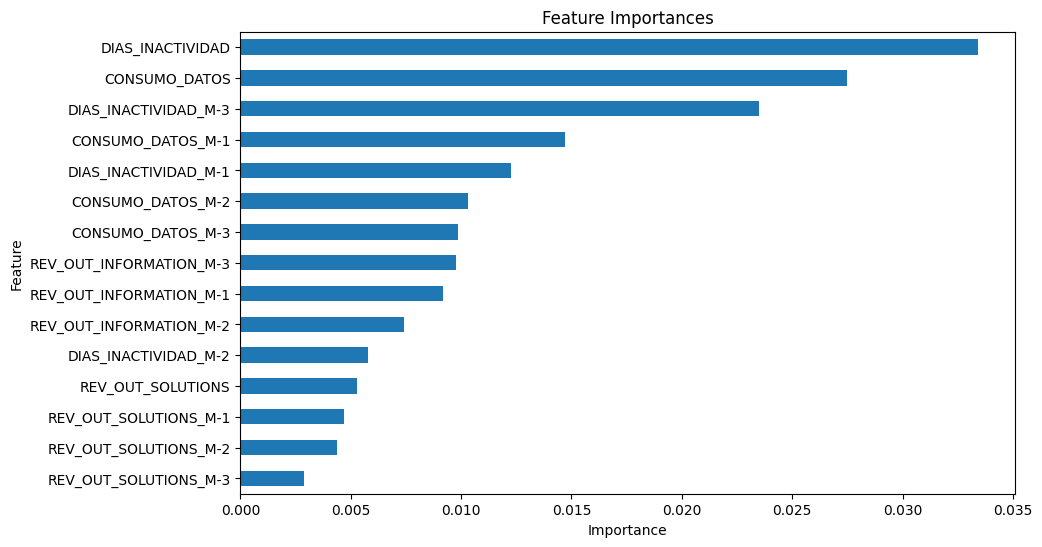

In [18]:
feature_importances = clf.feature_importances_

# Plot feature importances
importances = pd.Series(feature_importances, index=X_res.columns)
importances.tail(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [19]:
df.groupby(['TIPO','RAZON'])[['DIAS_INACTIVIDAD','CONSUMO_DATOS']].describe()

DIAS_INACTIVIDAD                                           \
                          count      mean        std  min  25%  50%  75%   
TIPO  RAZON                                                                
Base  Base             460611.0  8.882938  30.544250 -1.0  0.0  1.0  6.0   
Churn Port Out           9159.0  7.650944  20.375223  0.0  0.0  0.0  7.0   

                       CONSUMO_DATOS                                         \
                   max         count          mean           std  min   25%   
TIPO  RAZON                                                                   
Base  Base      2844.0      490841.0  4.262587e+06  9.253730e+06  0.0  38.0   
Churn Port Out  1065.0        6404.0  3.409322e+06  8.317524e+06  0.0   0.0   

                                                  
                     50%        75%          max  
TIPO  RAZON                                       
Base  Base      118371.8  4146573.0  622075739.0  
Churn Port Out       0.0  2087471.9   85808135.8

### Modelo robusto sólo con variales numéricas 

In [20]:
X2 = df_1500.drop(columns=['TIPO','RAZON','ID']).select_dtypes(include=[int, float]).fillna(0)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y, test_size=0.3, random_state=42)
X_res_2, y_res_2 = smote.fit_resample(X_train_2, y_train_2)

# Train the model
clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(X_res_2, y_res_2)

# Predict and evaluate
y_pred_2 = clf_2.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

        Base       1.00      1.00      1.00     79316
       Churn       0.93      0.89      0.91       921

    accuracy                           1.00     80237
   macro avg       0.96      0.94      0.95     80237
weighted avg       1.00      1.00      1.00     80237



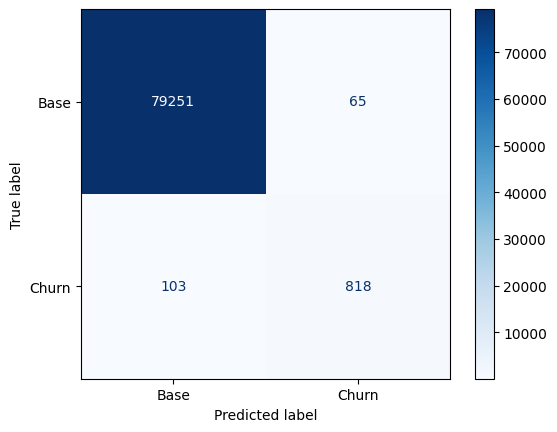

In [21]:
ConfusionMatrixDisplay.from_predictions(
   y_test_2, y_pred_2, cmap='Blues')
plt.show()

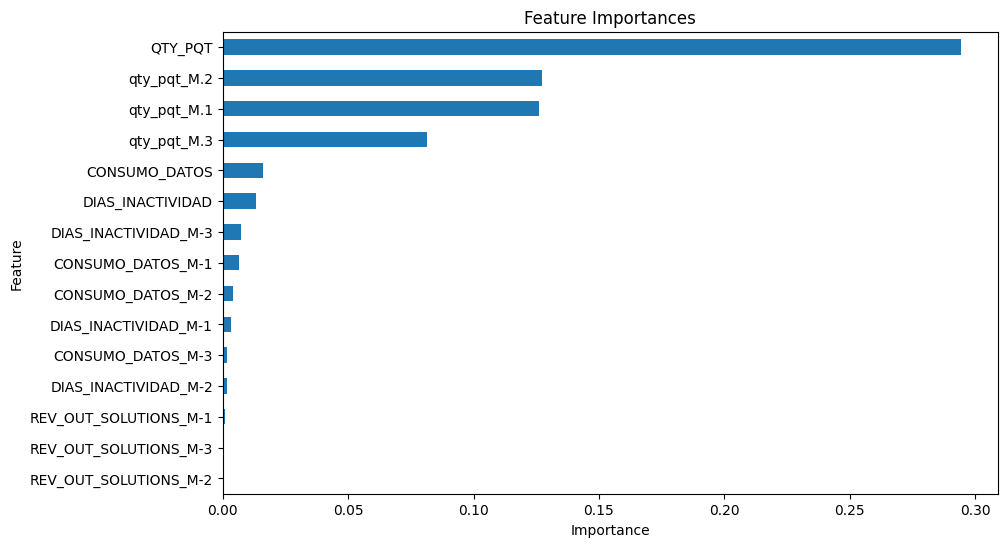

In [22]:
feature_importances_2 = clf_2.feature_importances_

# Plot feature importances
importances = pd.Series(feature_importances_2, index=X_res_2.columns)
importances.tail(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Modelo más robusto con variables numéricas y categóricas

In [26]:
X3 = df_1500.drop(columns=['TIPO','RAZON','ID'])

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y, test_size=0.3, random_state=42)


numerical_features = numerical_columns.to_list()
numerical_features.remove('ID')
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_features = categorical_columns
categorical_features.remove('RAZON')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('cat_encoder', OrdinalEncoder(handle_unknown='use_encoded_value',encoded_missing_value=-10, unknown_value=-5)),
    ('select', SelectKBest(chi2))  
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

model.fit(X_train_3, y_train_3)

score = model.score(X_test_3, y_test_3)
print(f'Model accuracy: {score:.2f}')

y_pred_3 = model.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))

Model accuracy: 1.00
              precision    recall  f1-score   support

        Base       1.00      1.00      1.00     79316
       Churn       0.98      0.86      0.92       921

    accuracy                           1.00     80237
   macro avg       0.99      0.93      0.96     80237
weighted avg       1.00      1.00      1.00     80237



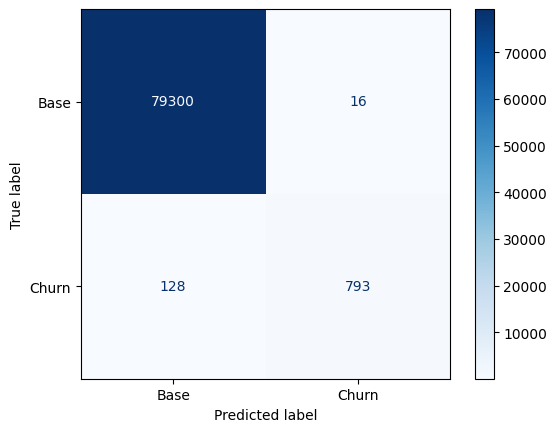

In [27]:
ConfusionMatrixDisplay.from_predictions(
   y_test_3, y_pred_3, cmap='Blues')
plt.show()

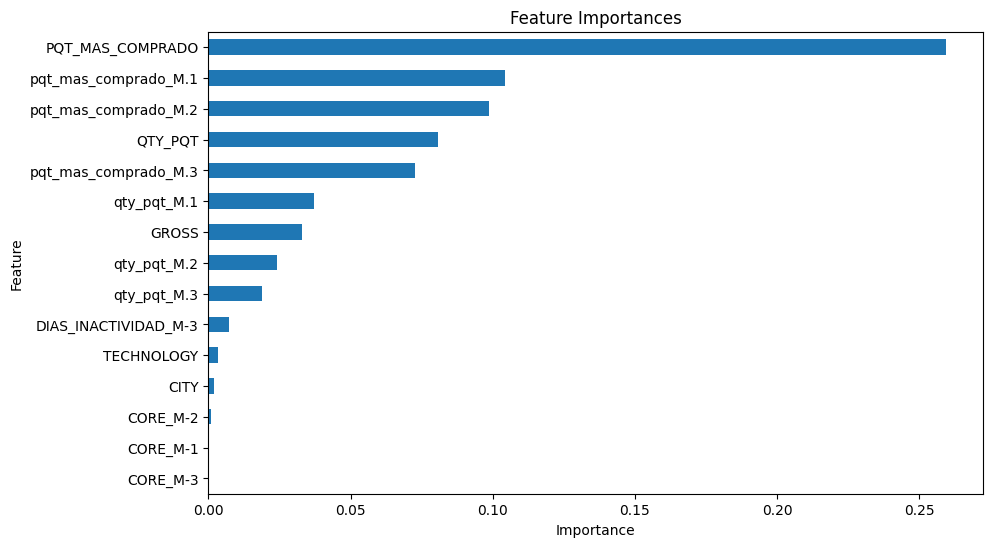

In [28]:

feature_importances_3 = model.named_steps['classifier'].feature_importances_

ordinal_indices = model.named_steps['preprocessor'].transformers_[1][1].named_steps['select'].get_support(indices=True)
all_features = list(numerical_features) + [categorical_features[i] for i in ordinal_indices]

importances = pd.Series(feature_importances_3, index=all_features)
importances.tail(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [83]:
T = df_1500.groupby(['TIPO','GROSS'])[['DIAS_INACTIVIDAD_M-2','DIAS_INACTIVIDAD_M-1']].describe()
T

DIAS_INACTIVIDAD_M-2                                            \
                           count       mean        std  min  25%  50%  75%   
TIPO  GROSS                                                                  
Base  N                 235838.0   3.680789  19.694259 -1.0  0.0  0.0  0.0   
      Y                  28413.0  11.092880  49.699566 -1.0  0.0  0.0  0.0   
Churn N                   3204.0   3.700687  18.158699  0.0  0.0  0.0  0.0   

                    DIAS_INACTIVIDAD_M-1                                       \
                max                count       mean        std  min  25%  50%   
TIPO  GROSS                                                                     
Base  N      2200.0             235838.0   2.142869  14.505090  0.0  0.0  0.0   
      Y      2650.0              28413.0  18.469715  55.535085 -1.0  0.0  0.0   
Churn N       256.0               3204.0   3.832709  16.897002 -1.0  0.0  0.0   

                           
              75%     max  
TIPO  GROSS                
Base  N       1.0  2230.0  
      Y      14.0  2680.0  
Churn N       0.0   268.0

In [61]:
df_1500[df_1500['TIPO']=='Churn']['TECHNOLOGY'].value_counts()

TECHNOLOGY
4G    2072
2G     915
3G     217
Name: count, dtype: int64

In [57]:
df_1500[df_1500['TIPO']=='Churn']['DEVICE_TYPE'].value_counts()

DEVICE_TYPE
SMARTPHONE             2696
LOW END                 364
FEATURE PHONE           129
MODEM                    10
OTHER MOBILE DEVICE       5
Name: count, dtype: int64

## Guardar y cargar modelo

In [46]:
import joblib

models = [clf, clf_2, model]

filename = '../models/modelo_base.sav'
joblib.dump(clf_2, open(filename, 'wb'))

loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test_2, y_test_2)
print(result)

0.99726
